![Image Description](./images/K-Means.jpeg)


# Environment Setup


These libraries must be installed in your Python Kernel before you run the code in this notebook.

In [4]:
pip install ipython
pip install seaborn
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


# Coding etiquette

### Start by clearing all output and workspace

In [21]:
# Clear plots
import matplotlib.pyplot as plt
plt.close('all')

# Clear console
from IPython.display import clear_output
clear_output()

# Clean workspace
%reset -f


### Import all necessary libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler


# Clustering

Clustering, in data science, is about grouping similar data points together so that data points in the same group (called a cluster) are more similar to each other than to those in other groups. K-Means is one of the simplest and most commonly used clustering algorithms.

## Purpose of K-Means
The main goal of K-Means is to partition a dataset into K distinct clusters. Each cluster is represented by its center (or "centroid"), and every data point is assigned to the cluster with the nearest centroid.

## Introduction to Clustering and K-Means in the Hospitality Industry

In the hospitality industry, understanding customer behavior is critical. Let's say you manage a hotel and want to group your guests based on their preferences for room service, stay duration, and spending behavior. This can help you create tailored offers for each group.

The K-Means algorithm helps by dividing your customers into distinct clusters based on these features. Each cluster will represent a group of customers who behave similarly.

## Example Problem:
You have 50 customers with 3 attributes:

Room Service Spend: How much they spend on room service (in dollars).
Stay Duration: How many nights they stayed at the hotel.
Total Bill: The total amount they paid for their stay.
We will:

Generate a dataset with these 50 customers.
Use the K-Means algorithm to divide them into 3 clusters (for example: budget, mid-range, and luxury customers).

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Set a random seed for reproducibility
np.random.seed(42)

# Generate 50 customer samples
# Room Service Spend, Stay Duration (nights), and Total Bill
room_service = np.random.randint(50, 400, size=50)  # Room service spend between $50 and $400
stay_duration = np.random.randint(1, 10, size=50)  # Stay duration between 1 and 10 nights
total_bill = room_service + stay_duration * np.random.randint(100, 500, size=50)  # Total bill combining stay and extras

# Combine into a DataFrame
customer_data = pd.DataFrame({
    'Room_Service_Spend': room_service,
    'Stay_Duration': stay_duration,
    'Total_Bill': total_bill
})

# Display first few rows of the dataset
customer_data.head()


,Room_Service_Spend,Stay_Duration,Total_Bill
0,152,9,3455
1,398,5,1058
2,320,2,614
3,156,4,800
4,121,7,2326


## Use Case
We now have a dataset of 50 customers. Each customer has data on their:

Room_Service_Spend: Amount spent on room service.
Stay_Duration: Number of nights they stayed.
Total_Bill: The total amount they paid for the stay.
Here’s how K-Means works:

Step 1: Choose K (number of clusters). We’ll set K=3 to group the customers into 3 segments.
Step 2: Initialize centroids. The algorithm will randomly initialize 3 centroids (the "center" of each cluster).
Step 3: Assign customers to the nearest centroid.
Step 4: Update the centroid locations based on the average position of all customers in each cluster.
Step 5: Repeat until the centroids don’t move much anymore (convergence).

Let’s run K-Means with 3 clusters on the customer dataset.



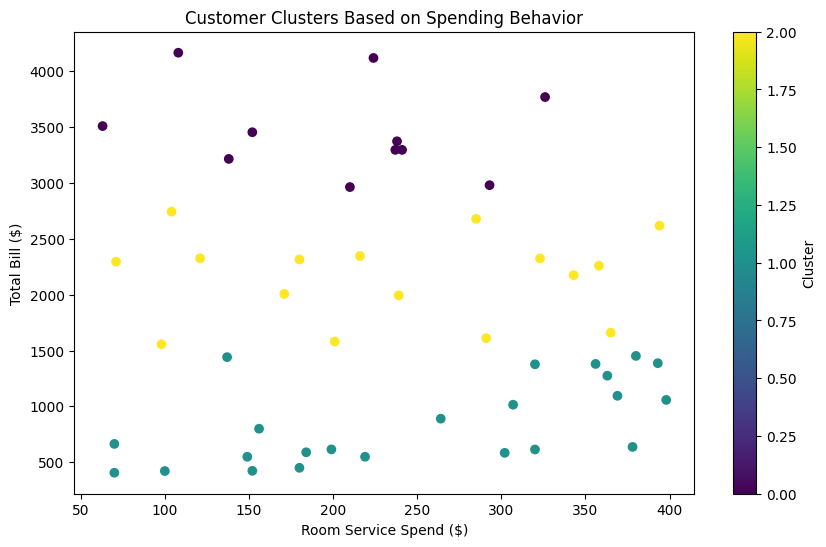

In [3]:
# Plot the clusters
plt.figure(figsize=(10, 6))

# Plot Total Bill vs Room Service Spend, colored by cluster
plt.scatter(customer_data['Room_Service_Spend'], customer_data['Total_Bill'], 
            c=customer_data['Cluster'], cmap='viridis')

# Add labels and title
plt.xlabel('Room Service Spend ($)')
plt.ylabel('Total Bill ($)')
plt.title('Customer Clusters Based on Spending Behavior')
plt.colorbar(label='Cluster')
plt.show()


## Analysis

Jupyter Markdown Cell:
This scatter plot shows how customers were grouped into clusters based on their Room Service Spend and Total Bill. Each color represents a different customer segment.

Cluster 0: Likely budget customers, spending less on room service and having a lower total bill.
Cluster 1: Likely mid-range customers, with moderate spending.
Cluster 2: Likely luxury customers, who stay longer and spend more on room service.
By identifying these groups, the hotel can tailor marketing strategies for each cluster, like offering special deals to budget customers or personalized services to luxury guests.

